In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Прочитайте файл bestsellers with categories.csv за допомогою методу read_csv
file_url = "https://drive.google.com/uc?export=download&id=1ocNYpg4eh3mPb2EviqqGQ4okZWtkYke2"
df = pd.read_csv(file_url)

In [157]:
# Виведіть перші п'ять рядків (використовується функція head)
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [158]:
# Виведіть розміри датасету (використовуйте атрибут shape)
df.shape

(550, 7)

In [159]:
# Відповідь: Про скільки книг зберігає дані датасет?
# 550 книг

In [160]:
# Для спрощення подальшої роботи давайте трохи підправимо назви змінних.
# snake_style
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head(2)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [161]:
# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
missing_values = df.isna().sum()
missing_values

,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


In [162]:
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
# ні

In [163]:
# Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = df['genre'].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

In [164]:
# Відповідь: Які є унікальні жанри?
# Відповідь: 'Non Fiction', 'Fiction'
list(unique_genres)

['Non Fiction', 'Fiction']

<Axes: title={'center': 'Prices'}, ylabel='Frequency'>

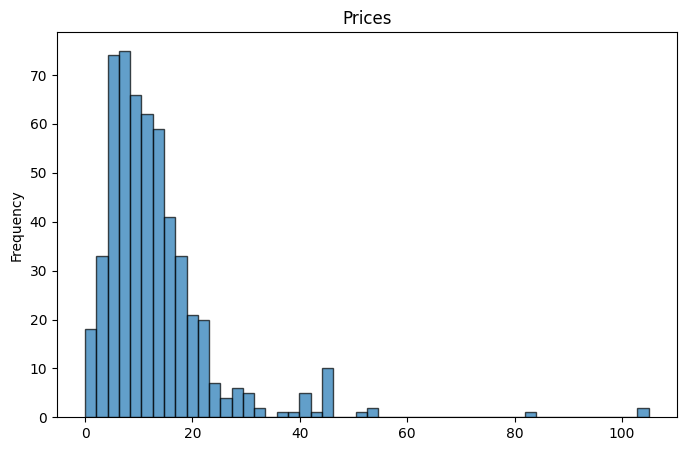

In [165]:
# Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df['price'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7, figsize=(8, 5), title="Prices")

In [166]:
# Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [167]:
# Відповідь: Максимальна ціна?
# Відповідь: 105
df['price'].max()

105

In [168]:
# Відповідь: Мінімальна ціна?
# Відповідь: 0
df['price'].min()

0

In [169]:
# Відповідь: Середня ціна?
# Відповідь: 13.1
df['price'].mean()

13.1

In [170]:
# Відповідь: Медіанна ціна?
# Відповідь: 11.0
df['price'].median()

11.0

In [171]:
# Відповідь: Який рейтинг у датасеті найвищий?
# Відповідь: 4.9
max_user_rating = df['user_rating'].max()
max_user_rating

4.9

In [172]:
# Відповідь: Скільки книг мають такий рейтинг?
# Відповідь: 52
max_user_rating_count = df['user_rating'].eq(max_user_rating).sum()
max_user_rating_count

52

In [173]:
# Відповідь: Яка книга має найбільше відгуків?
# Відповідь: Where the Crawdads Sing
max_reviews = df['reviews'].max()
book_with_max_reviews = df.loc[df['reviews'] == max_reviews]
book_with_max_reviews

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [174]:
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
# Відповідь: Publication Manual of the American Psychologic, Thug Kitchen: The Official Cookbook: Eat Like, Go Set a Watchman: A Novel

df_2015 = df.where(df['year'] == 2015).dropna()
# Сортуємо за ціною (від найвищої до найнижчої) та вибираємо Топ-50 а потім Топ-3
top_50_2015 = df_2015.sort_values(by='price', ascending=False).head(50)
top_3_2015 = top_50_2015.head(3)
top_3_2015

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580.0,46.0,2015.0,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128.0,23.0,2015.0,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982.0,19.0,2015.0,Fiction


In [175]:
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
# Відповідь: 0 книг
# Можливо я не вірно зрозумів завдання

df_50 = df.sort_values(by='user_rating', ascending=False).head(50)
df_50_2010_fiction = df_50[(df_50['year'] == 2010) & (df_50['genre'] == 'Fiction')]
len(df_50_2010_fiction)

0

In [176]:
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
# Відповідь: 1 книга
df_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
count_4_9 = len(df_4_9)
count_4_9

1

In [177]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році
# і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df_sorted = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price', ascending=False).head()
df_sorted

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction


In [178]:
# Відповідь: Яка книга остання у відсортованому списку?
# Відповідь: Love You Forever
df_sorted_last = df_sorted.iloc[-1]
df_sorted_last
# or
df_sorted.tail(1)

,name,author,user_rating,reviews,price,year,genre
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction


**Агрегування даних та з'єднання таблиць**

In [179]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg,
# для підрахунку мінімальних та максимальних значень використовуйте max та min).
# Не беріть усі стовпці, виберіть тільки потрібні вам

df_selected = df.groupby(by="genre", dropna=False)["price"].agg(["min", "max"])
df_selected

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [180]:
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
max_fiction_price = df_selected.loc["Fiction", "max"]
max_fiction_price

82

In [181]:
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
min_fiction_price = df_selected.loc["Fiction", "min"]
min_fiction_price

0

In [182]:
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
max_non_fiction_price = df_selected.loc["Non Fiction", "max"]
max_non_fiction_price

105

In [183]:
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0
min_non_fiction_price = df_selected.loc["Non Fiction", "min"]
min_non_fiction_price

0

In [184]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів
# (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Не беріть усі стовпці, виберете тільки потрібні
df_author_book_count = df.groupby("author", dropna=False)["name"].agg("count").reset_index()
df_author_book_count.columns = ["author", "book_count"]
df_author_book_count

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [185]:
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: 248x2
df_author_book_count.shape

(248, 2)

In [186]:
# Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
max_books = df_author_book_count["book_count"].max()
top_author = df_author_book_count[df_author_book_count["book_count"] == max_books]  # Фільтруємо за цим значенням
top_author['author']

,author
120,Jeff Kinney


In [187]:
# Відповідь: Скільки книг цього автора? Відповідь: 12
top_author['book_count']

,book_count
120,12


In [188]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора
# (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
# Не беріть усі стовпці, виберете тільки потрібні
df_author_avg_rating = df.groupby("author", dropna=False)["user_rating"].mean().reset_index()
df_author_avg_rating.columns = ["author", "avg_user_rating"]
df_author_avg_rating

,author,avg_user_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


In [189]:
# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
min_rating = df_author_avg_rating["avg_user_rating"].min()  # Знаходимо мінімальний рейтинг
worst_avg_rated_author = df_author_avg_rating[df_author_avg_rating["avg_user_rating"] == min_rating]  # Фільтруємо авторів
worst_avg_rated_author = worst_avg_rated_author[["author", "avg_user_rating"]]
worst_avg_rated_author["author"]

,author
71,Donna Tartt


In [190]:
# Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9
worst_avg_rated_author["avg_user_rating"]

,avg_user_rating
71,3.9


In [191]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
df_author_stats = pd.merge(df_author_book_count, df_author_avg_rating, on="author")
df_author_stats

,author,book_count,avg_user_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [192]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
df_author_stats_sorted = df_author_stats.sort_values(by=['book_count', 'avg_user_rating'])
df_author_stats_sorted

,author,book_count,avg_user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


In [193]:
# Відповідь: Який автор перший у списку?
first_author = df_author_stats_sorted.head(1)
first_author

,author,book_count,avg_user_rating
171,Muriel Barbery,1,4.0


In [194]:
# додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення,
# щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші.
# Можна використовувати як matplotlib, так і seaborn.

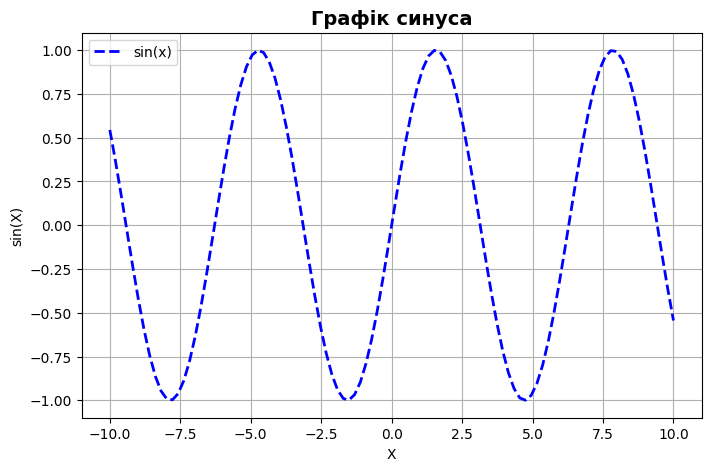

In [195]:
# Графік синуса

# Створюємо дані
x = np.linspace(-10, 10, 100)
y = np.sin(x)

# Створюємо графік
plt.figure(figsize=(8, 5))
plt.plot(x, y, color="b", linestyle="--", linewidth=2, label="sin(x)")
plt.title("Графік синуса", fontsize=14, fontweight='bold')
plt.xlabel("X")
plt.ylabel("sin(X)")
plt.legend()
plt.grid(True)

# Відображаємо графік
plt.show()

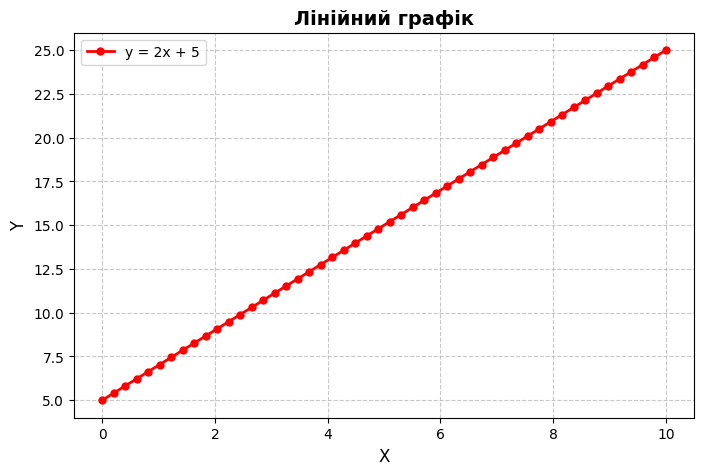

In [196]:
# Генеруємо дані
x = np.linspace(0, 10, 50)
y = 2 * x + 5  # Лінійна функція y = 2x + 5

# Побудова графіка
plt.figure(figsize=(8, 5))
plt.plot(x, y, color="r", marker="o", linestyle="-", linewidth=2, markersize=5, label="y = 2x + 5")

# Налаштування оформлення
plt.title("Лінійний графік", fontsize=14, fontweight='bold')
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Відображаємо графік
plt.show()

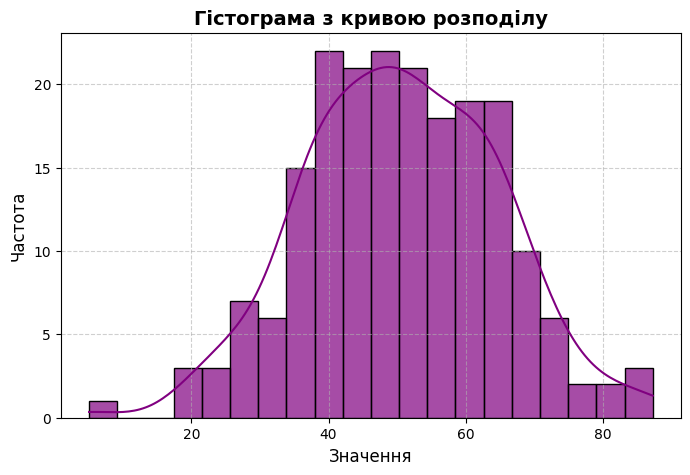

In [197]:
# Генеруємо випадкові дані
data = np.random.normal(loc=50, scale=15, size=200)

# Побудова графіка
plt.figure(figsize=(8, 5))
# sns.histplot() будує гістограму – це стовпчастий графік, який показує, як часто зустрічаються значення в певних діапазонах (бінів).
# data – масив випадкових чисел (в нашому випадку нормальний розподіл).
# kde=True – додає гладку криву розподілу (Kernel Density Estimation, KDE), яка допомагає побачити форму розподілу.
# bins=20 – кількість стовпчиків у гістограмі (чим більше, тим детальніший графік).
# color="purple" – задає фіолетовий колір стовпчиків.
# edgecolor="black" – чорні контури для кожного стовпця (робить графік чіткішим).
# alpha=0.7 – прозорість (0 = повна прозорість, 1 = непрозорий).
sns.histplot(data, kde=True, bins=20, color="purple", edgecolor="black", alpha=0.7)

# Налаштування оформлення
plt.title("Гістограма з кривою розподілу", fontsize=14, fontweight="bold")
plt.xlabel("Значення", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Відображаємо графік
plt.show()

In [198]:
# кінець завдання